In [2]:
import pandas as pd
import numpy as np
import pickle 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold  

from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.cross_validation import cross_val_score

import warnings
warnings.filterwarnings('ignore')

%pylab inline 
%config InlineBackend.figure_format = 'svg'
seaborn.set_style("white")

/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Populating the interactive namespace from numpy and matplotlib


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
pd.set_option('precision', 3)
np.random.seed(4)

In [4]:
df = pd.DataFrame.from_csv('main_data.csv')

In [5]:
df.columns

Index(['NAME', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG_pct', 'P3', 'PA3', 'P3_pct',
       'P2', 'PA2', 'P2_pct', 'eFG_pct', 'FT', 'FTA', 'FT_pct', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'futPTS'],
      dtype='object')

In [6]:
# SELECTED FEATURES
matrix_string='futPTS ~ G + MP + PTS + FG_pct + FG + ORB + DRB + TOV + eFG_pct + TRB + STL + PF'
y,X = patsy.dmatrices(matrix_string,data=df,return_type='dataframe')
model = sm.OLS(y,X)
fit = model.fit()

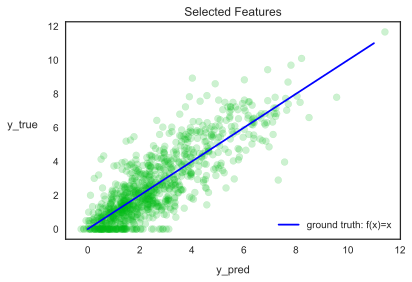

In [7]:
y_pred = fit.predict(X)
plt.scatter(y_pred, y, alpha=0.2, color='#03bc16')

plt.title('Selected Features')
plt.xlabel('y_pred',labelpad=10)
plt.ylabel('y_true',rotation=0,labelpad=25)
plt.plot(np.arange(0,12,1),np.arange(0,12,1),color='blue',label='ground truth: f(x)=x')
plt.legend(loc='lower right', shadow=False)

In [8]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 futPTS   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     176.4
Date:                Mon, 23 Jul 2018   Prob (F-statistic):          1.15e-227
Time:                        16:22:37   Log-Likelihood:                -1447.0
No. Observations:                 922   AIC:                             2920.
Df Residuals:                     909   BIC:                             2983.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0106      0.260     -0.041      0.967      -0.520       0.499
G              0.0151      0.003      5.014      0.000       0.009       0.021
MP            -0.0521      0.018     -2.919      0.004      -0.087      -0.017
PTS            0.5473      0.075      7.306      0.000       0.400       0.694
FG_pct         3.4831      2.001      1.741      0.082      -0.444       7.410
FG            -0.3458      0.185     -1.865      0.062      -0.710       0.018
ORB           -2.4214      1.371     -1.767      0.078      -5.111       0.269
DRB           -2.3197      1.369     -1.694      0.091      -5.007       0.367
TOV           -0.3030      0.129     -2.341      0.019      -0.557      -0.049
eFG_pct       -3.2364      1.973     -1.640      0.101      -7.109       0.637
TRB            2.4012      1.367      1.757      0.079      -0.281       5.083
STL            0.4346      0.157      2.761      0.006       0.126       0.743
PF            -0.1815      0.096     -1.899      0.058      -0.369       0.006
==============================================================================
Omnibus:                       42.885   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               64.613
Skew:                           0.394   Prob(JB):                     9.32e-15
Kurtosis:                       4.031   Cond. No.                     4.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
poly = preprocessing.PolynomialFeatures(3)
lm_poly = linear_model.LinearRegression(fit_intercept=True)

poly.fit(X)
X_transformed = poly.transform(X)
lm_poly.fit(X_transformed, y)#03bc16
poly_pred = lm_poly.predict(X_transformed);

lm_poly.score(X_transformed,y)

0.85685418755973508

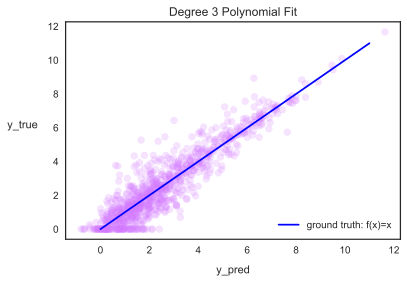

In [10]:
plt.scatter(poly_pred, y, color='#d57aff', alpha=0.2)
plt.plot(np.arange(0,12,1),np.arange(0,12,1),color='blue',label='ground truth: f(x)=x')

plt.xlabel('y_pred',labelpad=10)
plt.ylabel('y_true',rotation=0,labelpad=25)
plt.title('Degree 3 Polynomial Fit')
plt.legend(loc='lower right', shadow=False)

In [11]:
reg3 = LinearRegression(fit_intercept=True)
res_cv = {}
res_train = {}
for degree in range(4):
    
    poly3 = PolynomialFeatures(degree)
    XPoly = poly3.fit_transform(X)
    
    scores = cross_val_score(reg3, XPoly, y, cv=10, scoring='mean_squared_error') # cross val
    res_cv[degree] = np.mean(-scores)
    
    reg3.fit(XPoly,y)
    y_pred3 = reg3.predict(XPoly)
    res_train[degree] = np.sum((y_pred3-y)**2)/len(y)

The degree 1 had an MSE of: 1.40842739894


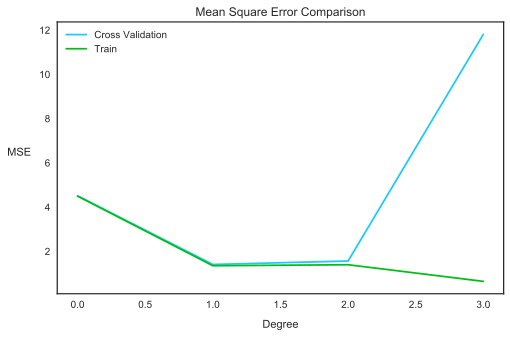

In [16]:
degrees = list(res_cv.keys())
mse_cv = list(res_cv.values())
mse_train = list(res_train.values())

plt.figure(figsize=[8,5])
plt.plot(degrees, mse_cv, color='#19c9ff')#19c9ff
plt.plot(degrees,mse_train, color='#03bc16')
plt.xlabel('Degree', labelpad=10)
plt.ylabel('MSE', rotation=0, labelpad=20)
plt.title('Mean Square Error Comparison')
plt.legend(['Cross Validation','Train'])

loc = np.argmin(list(res_cv.values()))
print('The degree',degrees[loc],'had an MSE of:',mse_cv[loc])

In [12]:
# cross validation R^2

reg = LinearRegression(fit_intercept=True)
scores_cv_r2 = cross_val_score(reg, X, y, cv=10, scoring='r2')

avg_cv_r2 = np.mean(scores_cv_r2)
cv_r2_std = np.std(scores_cv_r2)

print('avg r2 is:', avg_cv_r2, '+/-', cv_r2_std)

avg r2 is: 0.676574078368 +/- 0.0623256976877


In [13]:
# cross validation Mean Square Error

scores_cv_mse = cross_val_score(reg, X, y, cv=10, scoring='mean_squared_error')

avg_cv_mse = np.mean(-scores_cv_mse)
cv_mse_std = np.std(-scores_cv_mse)

print('avg mse is:', avg_cv_mse, '+/-', cv_r2_std)

avg mse is: 1.40842739894 +/- 0.0623256976877


In [14]:
points_difference = np.sqrt(avg_cv_mse)
print(points_difference)

1.18677183946
